
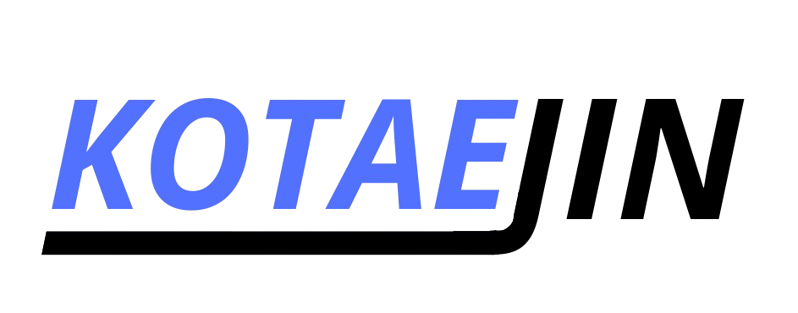

# Sumário

- Descrição do problema
 - Perguntas para serem respondidas utilizando a análise exploratória
- Configurações iniciais
 - Instalando Bibliotecas
 - Realização dos imports
 - Conectando ao google drive
 - Definição de caminhos para a base
- Análise exploratória
 - Definição de funções para a análise exploratória
 - Principais dúvidas do chat
 - Palavras que são mais escritas incorretamente
 - Gírias mais utilizadas pelos clientes
 - Pontuações mais frequentes nas perguntas
 - Bigramas mais frequentes nas respostas ao cliente
- Definição de funções de etapas de pré-processamento
 - Lendo base de dados
 - Treinando tagger floresta
 - Definindo funções para o pré-processamento
 - Testes das funções de pré-processamento
- Uso de Pipeline de pré-processamento
 - Definição da Pipeline
 - Lendo perguntas da base de dados para realização de testes
 - Execução da pipeline
 - Exibição de resultados obtidos
 - Testes de validação de Pipeline
- Bag of Words
 - Definição de função de vetorização Bag of Words (BoW)
 - Testes Bag of Words
- Naive Bayes (NB)
 - Definição da função de treinamento do classificador Naive Bayes (NB)
 - Testes classificador Naive Bayes
- Apresentação da matriz de confusão
 - Matriz do modelo com bow próprio
 - Métricas Escolhidas Para Avaliar a Qualidade do Modelo
- Modelo com Bow **importada**
- Análise Treinamento GPU x CPU
 - Comparação de Resultados

# Descrição do Problema

Conforme descrito no [TAPI](https://drive.google.com/drive/u/1/folders/1N6OswJHbb8QLdlJ9wX9T_IU9zWtTIsNU), dentro do tópico "Esboço do Problema" e do subtópico "Problema", o Serviço de Atendimento ao Cliente (SAC) enfrenta uma demanda elevada, com mais de 25 mil atendimentos mensais realizados via chat online (Live Chat) em múltiplos idiomas. Este volume de solicitações ultrapassa a capacidade de resposta dos atendentes humanos, resultando em atrasos no atendimento e gerando insatisfação entre os clientes.

De acordo com o subtópico "Objetivo" no [TAPI](https://drive.google.com/drive/u/1/folders/1N6OswJHbb8QLdlJ9wX9T_IU9zWtTIsNU), para enfrentar este desafio, será desenvolvido um chatbot utilizando modelos abertos de IA Generativa, com foco no atendimento ao cliente. Este chatbot será gerido por um grupo de usuários internos, que poderão criar, operar e personalizar o sistema de forma contínua. Durante o projeto, um desenvolvedor da Brastel, localizado no Brasil, será designado para colaborar no desenvolvimento, garantindo que os protótipos desenvolvidos possam ser efetivamente utilizados na construção do sistema final.


### Perguntas para Análise Exploratória

1. **Em qual período do dia o chat recebe mais acessos?**
   - **Propósito:** Entender os momentos de pico de uso do chat ao longo do dia é essencial para planejar a escalabilidade do sistema e prevenir possíveis congestionamentos devido ao alto número de acessos simultâneos.

2. **Quais são as dúvidas mais frequentes entre os usuários?**
   - **Propósito:** Identificar as dúvidas mais comuns permite configurar respostas pré-definidas no chatbot, otimizando o tempo de resposta e reduzindo o processamento desnecessário.

3. **Qual é a proporção de palavras recorrentes escritas de maneira incorreta?**
   - **Propósito:** Avaliar a frequência de erros ortográficos comuns ajuda a treinar o modelo para reconhecer e interpretar corretamente essas variações, melhorando a eficiência do chatbot.

4. **As mensagens contêm muitas gírias ou abreviações?**
   - **Propósito:** Analisar o uso de gírias e abreviações nas mensagens é importante, pois o modelo precisa ser treinado para entender esses termos. Identificar as mais comuns auxilia no treinamento para aumentar a precisão do chatbot.

5. **O uso de pontuação é frequente nas mensagens?**
   - **Propósito:** Compreender o padrão de uso de pontuação nas mensagens ajuda a entender o estilo de comunicação dos usuários. A pontuação pode mudar o sentido das frases, transformando uma afirmação em uma pergunta, por exemplo, o que é crítico para a interpretação correta pelo chatbot.

6. **As respostas dos usuários seguem algum padrão específico?**
   - **Propósito:** Identificar padrões nas respostas pode revelar se há uma repetição significativa de perguntas ou respostas, o que pode ser utilizado para otimizar as interações e treinamentos do chatbot.


#Configurações Iniciais

In [ ]:
DOWNLOAD_DF = False
DOWNLOAD_DF_NUMERIC = False

## Instalando Bibliotecas

In [ ]:
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install -U scikit-learn
!pip install openpyxl
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Realização dos imports

Nesta etapa, o colab é preparado com a instalação e importação de bibliotecas e pacotes necessários para a execução do projeto.

In [ ]:
import spacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import floresta
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import RSLPStemmer
from collections import defaultdict
import re
import pandas as pd
from IPython.display import display
from nltk.tag import UnigramTagger
import string
import matplotlib.pyplot as plt
from collections import Counter
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files
import random
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import unittest
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import time
import tensorflow as tf
from nltk.tag import pos_tag
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('rslp')
nlp = spacy.load("pt_core_news_sm")
nltk.download('floresta')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is

True

## Conectando ao google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Definição de caminhos para a base

In [ ]:
DEFAULT_XLS_PATH = "/content/drive/MyDrive/m11/data/chat_clients.xlsx"
DEFAULT_CSV_PATH = "/content/drive/MyDrive/m11/data/data.csv"

def get_file_paths():
    xls_path = input(f"Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padrão): ")
    xls_path = xls_path if xls_path.strip() else DEFAULT_XLS_PATH

    csv_path = input(f"Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padrão): ")
    csv_path = csv_path if csv_path.strip() else DEFAULT_CSV_PATH

    return xls_path, csv_path

XLS_PATH, CSV_PATH = get_file_paths()

Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padrão): 
Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padrão): 


#Análise exploratória

## Definição de funções para a análise exploratória

In [ ]:
def remocao_stopword(text):
    stop_words = set(stopwords.words('portuguese'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def conversao_minuscula(text):
    try:
        text = text.lower()
    except:
        pass
    return text

def encontrar_erros(texto):
    spell = SpellChecker(language='pt')
    palavras = texto.split()
    palavras_erradas = spell.unknown(palavras)
    return palavras_erradas

def limpar_sentenca(sentence: str) -> str:
    cleaned_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
    return cleaned_sentence

def verificar_giras_abreviacoes(texto, giras_abreviacoes):
    palavras = texto.lower().split()
    giras_encontradas = [palavra for palavra in palavras if palavra in giras_abreviacoes]
    return giras_encontradas

def contar_pontuacoes(texto):
    pontuacoes = re.findall(r'[^\w\s]', texto)
    return pontuacoes

def encontrar_bigramas(texto):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform([texto])
    bigramas = vectorizer.get_feature_names_out()
    frequencias = bag_of_words.toarray().sum(axis=0)
    return dict(zip(bigramas, frequencias))

In [ ]:
df_filtrado = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]
df_filtrado.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)

df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(limpar_sentenca)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(remocao_stopword)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(conversao_minuscula)
df_filtrado['Intencao'] = df_filtrado['Intencao'].apply(conversao_minuscula)
df_filtrado['Resposta'] = df_filtrado['Resposta'].apply(conversao_minuscula)


df_filtrado

,Intencao,Pergunta,Resposta
0,como depositar,boa diatudo bemeu gostaria saber sobre caixa f...,"bom dia! sim, o sr pode utilizar o cartão de d..."
1,como fazer remessa,como enviar dinheiro japo,"para se inscrever no serviço de remessa, por f..."
2,tempo de remessa,quanto tempo levar beneficirio receber dinheiro,"via de regra, as remessas serão pagas via pix ..."
3,"pedido de envio via metodo ""byphone""",boa tarde acabei fazer transferncia 2223 total...,iremos processar a sua solicitacao.\nmuito obr...
4,"pedido de envio via metodo ""byphone""",poderia fazer remessa 22yenes bbb rrr obrigado...,iremos processar a sua solicitacao.\nmuito obr...
...,...,...,...
500,atualizacao de dados cadastrais,boa tarde fao fazer mudana endereo,a senhora pode trocar pelo próprio app da bras...
501,tempo de entrega do cartao,bom dia consegui fazer depsito carto ainda che...,boa noite\no sr solicitou dia 28. será entregu...
502,cancelamento,boa noitea beneficiria avisou conta est errado...,"sim, podemos cancelar\no valor voltará no seu ..."
503,reembolso,boa noite eu fiz depsito errado pra depositar ...,é possível solicitar o reembolso diretamente d...


## Principais dúvidas do chat

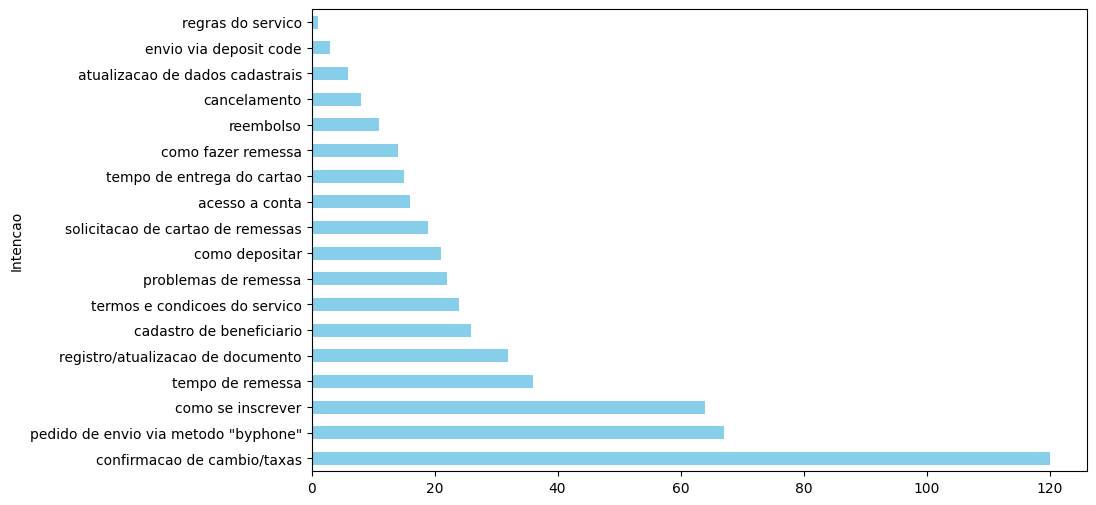

In [ ]:
contagem = df_filtrado['Intencao'].value_counts()
plt.figure(figsize=(10, 6))
contagem.plot(kind='barh', color='skyblue')

plt.show()

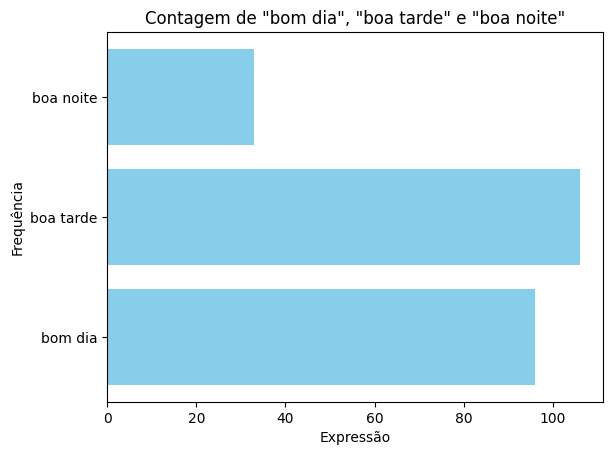

In [ ]:
data = {
    'mensagens': [
        'bom dia',
        'boa tarde',
        'boa noite'
    ]
}

df = pd.DataFrame(data)

contagem = {
    'bom dia': df_filtrado['Pergunta'].str.contains('bom dia', case=False).sum(),
    'boa tarde': df_filtrado['Pergunta'].str.contains('boa tarde', case=False).sum(),
    'boa noite': df_filtrado['Pergunta'].str.contains('boa noite', case=False).sum()
}

plt.barh(list(contagem.keys()), list(contagem.values()), color=['skyblue'])
plt.xlabel('Expressão')
plt.ylabel('Frequência')
plt.title('Contagem de "bom dia", "boa tarde" e "boa noite"')
plt.show()

## Palavras que são mais escritas incorretamente

In [ ]:
spell = SpellChecker(language='pt')
stop_words = set(stopwords.words('portuguese'))


def preprocessar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

def encontrar_erros(texto):
    texto = preprocessar_texto(texto)
    palavras = texto.split()
    erros = [palavra for palavra in palavras if palavra not in stop_words and palavra not in spell]
    return erros

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

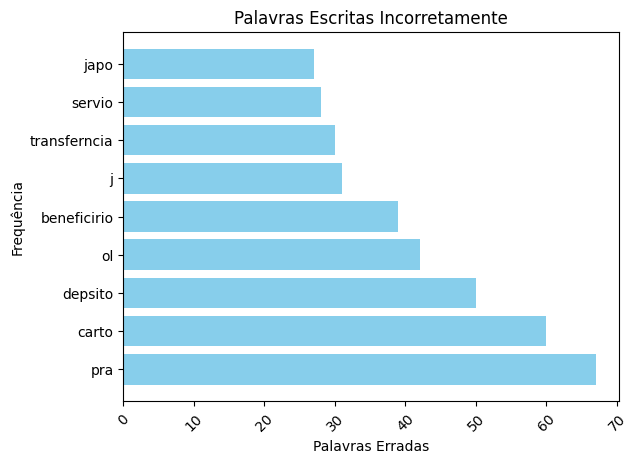

In [ ]:
df_filtrado['erros'] = df_filtrado['Pergunta'].apply(lambda x: encontrar_erros(x))
todos_erros = [erro for sublist in df_filtrado['erros'] for erro in sublist]
contagem_erros = Counter(todos_erros)
top_erros = contagem_erros.most_common(10)[1:]
palavras, frequencias = zip(*top_erros)
plt.barh(list(palavras), list(frequencias), color='skyblue')
plt.xlabel('Palavras Erradas')
plt.ylabel('Frequência')
plt.title('Palavras Escritas Incorretamente')
plt.xticks(rotation=45)

## Gírias mais utilizadas pelos clientes

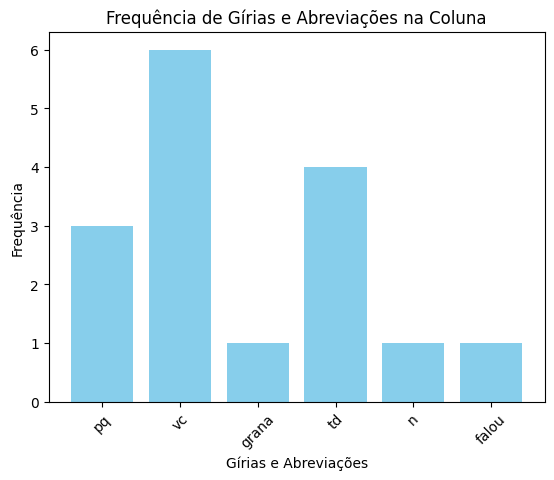

In [ ]:
giras_abreviacoes = [
    "rolê", "zoar", "dahora", "massa", "mano", "man", "bicho", "treta", "falou",
    "sussa", "balada", "perifa", "bagulho", "cabuloso", "grana", "leco",
    "vc", "tb", "blz", "qnd", "pq", "ctz", "fds", "tbm", "mt", "flw", "n",
    "td", "tlg", "tá", "lol", "brb", "omg", "btw", "asap"
]

df_filtrado['giras_encontradas'] = df_filtrado['Pergunta'].apply(lambda x: verificar_giras_abreviacoes(x, giras_abreviacoes))

todos_giras = [giria for sublist in df_filtrado['giras_encontradas'] for giria in sublist]
contagem_giras = Counter(todos_giras)

plt.bar(contagem_giras.keys(), contagem_giras.values(), color='skyblue')
plt.xlabel('Gírias e Abreviações')
plt.ylabel('Frequência')
plt.title('Frequência de Gírias e Abreviações na Coluna')
plt.xticks(rotation=45)
plt.show()

## Pontuações mais frequentes nas perguntas

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


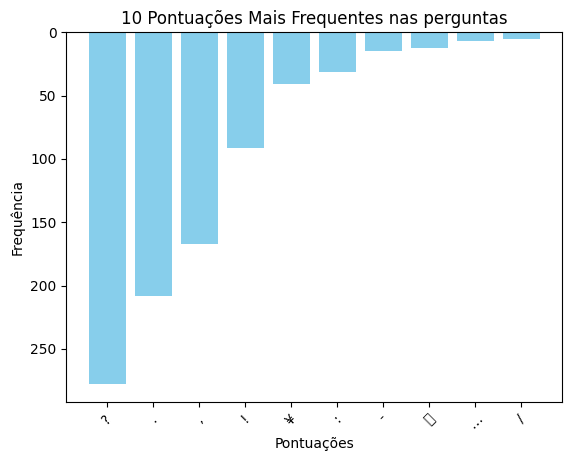

In [ ]:
df = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]

df['pontuacoes'] = df['Pergunta'].apply(contar_pontuacoes)

todas_pontuacoes = [ponto for sublist in df['pontuacoes'] for ponto in sublist]
contagem_pontuacoes = Counter(todas_pontuacoes)

top_10_pontuacoes = contagem_pontuacoes.most_common(10)

pontuacoes, frequencias = zip(*top_10_pontuacoes)

plt.bar(pontuacoes, frequencias, color='skyblue')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')
plt.title('10 Pontuações Mais Frequentes nas perguntas')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

## Bigramas mais frequentes nas respostas ao cliente

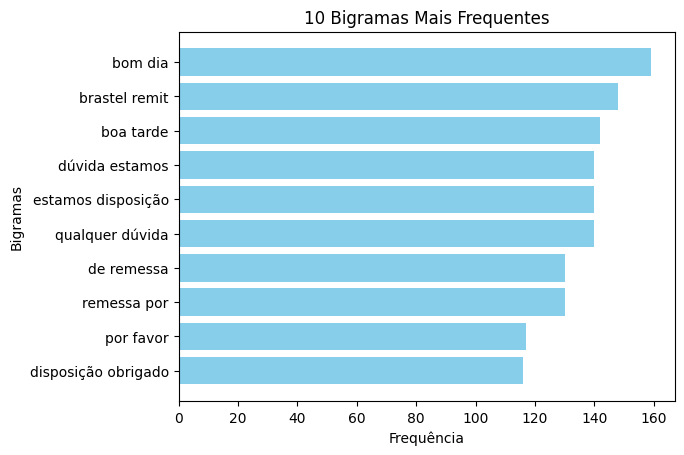

In [ ]:
df['Resposta\n'] = df['Resposta\n'].fillna('')

todos_bigramas = Counter()
for texto in df['Resposta\n']:
    try:
        bigramas = encontrar_bigramas(texto)
        todos_bigramas.update(bigramas)
    except:
        pass

top_10_bigramas = todos_bigramas.most_common(10)

bigramas, frequencias = zip(*top_10_bigramas)

plt.barh(bigramas, frequencias, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigramas')
plt.title('10 Bigramas Mais Frequentes')
plt.gca().invert_yaxis()
plt.show()

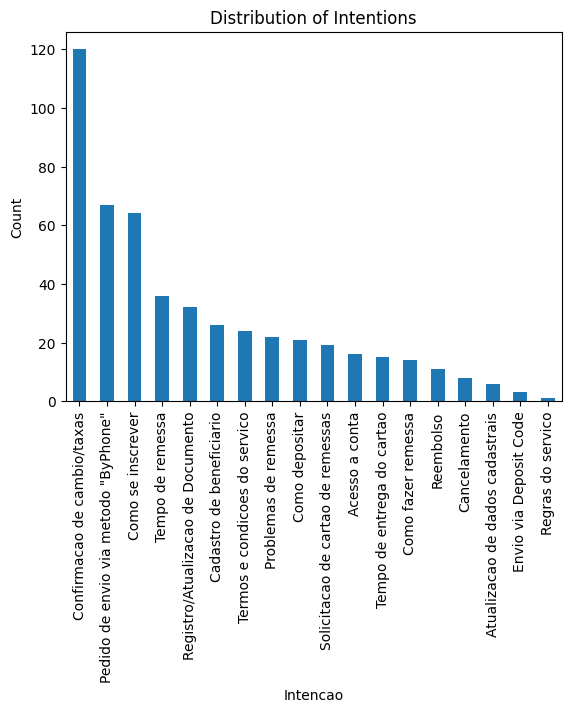

In [ ]:
import matplotlib.pyplot as plt

df['Intencao'].value_counts().plot(kind='bar')
plt.xlabel('Intencao')
plt.ylabel('Count')
_ = plt.title('Distribution of Intentions')

#Definição de funções de etapas de pré-processamento

## lendo base de dados

In [ ]:
file_path = CSV_PATH

headers = ["numero", "intencao", "pergunta", "resposta"]

csv_words = pd.read_csv(file_path, sep=";")

csv_words.shape

(981, 24)

In [ ]:
csv_words.dropna(axis=1, how="all", inplace=True)
csv_words.dropna(axis=0, how="all", inplace=True)

csv_words.shape

(505, 4)

In [ ]:
csv_words = csv_words.apply(lambda x: x.str.replace("\n", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\t", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\r", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\f", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\v", " ", regex=False) if x.dtype == "object" else x)

In [ ]:
print(df.shape)
csv_words.head()

(505, 4)


,No,Intencao,Pergunta,Resposta\n
0,1.0,Como depositar,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o sr pode utilizar o cartão de d..."
1,2.0,Como fazer remessa,Como enviar dinheiro do Japão?,"Para se inscrever no serviço de remessa, por f..."
2,3.0,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
3,4.0,"Pedido de envio via metodo ""ByPhone""",Boa tarde Acabei de fazer a transferência de 2...,iremos processar a sua solicitacao. Muito obri...
4,5.0,"Pedido de envio via metodo ""ByPhone""",Poderia fazer a remessa de 22yenes para o BBB ...,iremos processar a sua solicitacao. Muito obri...


## Definindo funções para o pré-processamento

In [ ]:
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string

# Carregue o modelo do spaCy para português
nlp = spacy.load('pt_core_news_sm')

def segmentar(texto):
    """Segmenta o texto em sentenças."""
    return sent_tokenize(texto, language='portuguese')

def tokenizar(texto):
    """Tokeniza o texto em palavras."""
    return word_tokenize(texto, language='portuguese')

def lematizar(tokens):
    """Lemmatiza tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

def stemming(tokens):
    """Aplica stemming aos tokens usando RSLPStemmer."""
    stemmer = RSLPStemmer()
    return [stemmer.stem(token) for token in tokens]

def remover_stopwords(tokens):
    """Remove stopwords dos tokens."""
    stop_words = set(stopwords.words("portuguese"))
    return [word for word in tokens if word.lower() not in stop_words]

def pos_tagging(tokens):
    """Realiza POS tagging nos tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    return [(token.text, token.pos_) for token in doc]

def remover_pontuacao(tokens):
    """Remove pontuação dos tokens."""
    return [token for token in tokens if token not in string.punctuation]

def reconhecimento_entidades_nomeadas(tokens):
    """Reconhece entidades nomeadas nos tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


## Testes das funções de pré-processamento

In [ ]:
# Texto de exemplo
texto = "O Leandro comprou um carro novo. Ele está muito feliz com a nova aquisição!"

In [ ]:
# Teste da função segmentar
resultado_esperado_segmentar = ['O Leandro comprou um carro novo.', 'Ele está muito feliz com a nova aquisição!']
resultado_obtido_segmentar = segmentar(texto)
assert resultado_obtido_segmentar == resultado_esperado_segmentar, f"Erro no teste de segmentação. Esperado: {resultado_esperado_segmentar}, Obtido: {resultado_obtido_segmentar}"
print("Teste de segmentação passou!")

Teste de segmentação passou!


In [ ]:
# Teste da função tokenizar
resultado_esperado_tokenizar = ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo', '.', 'Ele', 'está', 'muito', 'feliz', 'com', 'a', 'nova', 'aquisição', '!']
resultado_obtido_tokenizar = tokenizar(texto)
assert resultado_obtido_tokenizar == resultado_esperado_tokenizar, f"Erro no teste de tokenização. Esperado: {resultado_esperado_tokenizar}, Obtido: {resultado_obtido_tokenizar}"
print("Teste de tokenização passou!")

Teste de tokenização passou!


In [ ]:
# Teste da função lematizar
tokens_exemplo = ['Leandro', 'comprou', 'carros']
resultado_esperado_lematizar = ['Leandro', 'comprar', 'carro']
resultado_obtido_lematizar = lematizar(tokens_exemplo)
assert resultado_obtido_lematizar == resultado_esperado_lematizar, f"Erro no teste de lematização. Esperado: {resultado_esperado_lematizar}, Obtido: {resultado_obtido_lematizar}"
print("Teste de lematização passou!")

Teste de lematização passou!


In [ ]:
# Teste da função stemming
resultado_esperado_stemming = ['leandr', 'compr', 'carr']
resultado_obtido_stemming = stemming(tokens_exemplo)
assert resultado_obtido_stemming == resultado_esperado_stemming, f"Erro no teste de stemming. Esperado: {resultado_esperado_stemming}, Obtido: {resultado_obtido_stemming}"
print("Teste de stemming passou!")

Teste de stemming passou!


In [ ]:
# Teste da função remover_stopwords
resultado_esperado_remover_stopwords = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_stopwords = remover_stopwords(tokens_exemplo)
assert resultado_obtido_remover_stopwords == resultado_esperado_remover_stopwords, f"Erro no teste de remoção de stopwords. Esperado: {resultado_esperado_remover_stopwords}, Obtido: {resultado_obtido_remover_stopwords}"
print("Teste de remoção de stopwords passou!")

Teste de remoção de stopwords passou!


In [ ]:
# Teste da função pos_tagging
resultado_esperado_pos_tagging = [('Leandro', 'PROPN'), ('comprou', 'VERB'), ('carros', 'NOUN')]
resultado_obtido_pos_tagging = pos_tagging(tokens_exemplo)
assert resultado_obtido_pos_tagging == resultado_esperado_pos_tagging, f"Erro no teste de POS tagging. Esperado: {resultado_esperado_pos_tagging}, Obtido: {resultado_obtido_pos_tagging}"
print("Teste de POS tagging passou!")

Teste de POS tagging passou!


In [ ]:
# Teste da função remover_pontuacao
tokens_com_pontuacao = ['Leandro', ',', 'comprou', 'carros', '.']
resultado_esperado_remover_pontuacao = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_pontuacao = remover_pontuacao(tokens_com_pontuacao)
assert resultado_obtido_remover_pontuacao == resultado_esperado_remover_pontuacao, f"Erro no teste de remoção de pontuação. Esperado: {resultado_esperado_remover_pontuacao}, Obtido: {resultado_obtido_remover_pontuacao}"
print("Teste de remoção de pontuação passou!")

Teste de remoção de pontuação passou!


In [ ]:
# Teste da função reconhecimento_entidades_nomeadas
resultado_esperado_reconhecimento_entidades = [('Leandro', 'PER')]
resultado_obtido_reconhecimento_entidades = reconhecimento_entidades_nomeadas(tokens_exemplo)
assert resultado_obtido_reconhecimento_entidades == resultado_esperado_reconhecimento_entidades, f"Erro no teste de reconhecimento de entidades nomeadas. Esperado: {resultado_esperado_reconhecimento_entidades}, Obtido: {resultado_obtido_reconhecimento_entidades}"
print("Teste de reconhecimento de entidades nomeadas passou!")

Teste de reconhecimento de entidades nomeadas passou!


#Uso de Pipeline de pré-processamento

## Definição da Pipeline

In [ ]:
def pipeline_preprocessamento(texto, intencao, aplicar_segmentacao=True, aplicar_tokenizacao=True, aplicar_lematizacao=True,
                              aplicar_stemming=True, aplicar_remocao_stopwords=True, aplicar_pos_tagging=True,
                              aplicar_reconhecimento_entidades=True, aplicar_remocao_pontuacao=True):
    if aplicar_segmentacao:
        sentencas = segmentar(texto)
    else:
        sentencas = [texto]

    used_random_numbers = set()

    resultados = []

    sentencaIndex = 0
    for sentenca in sentencas:
        print(f"Processing sentence: {sentenca}")

        output = {'Sentenca Original': sentenca}

        if aplicar_tokenizacao:
            tokens = tokenizar(sentenca)
            print(f"Tokens: {tokens}")

        if aplicar_lematizacao:
            tokens = lematizar(tokens)
            print(f"Lemmatized Tokens: {tokens}")

        if aplicar_reconhecimento_entidades:
            entidades = reconhecimento_entidades_nomeadas(tokens)
            print(f"Named Entities: {entidades}")
            named_entity_tokens = {entity[0] for entity in entidades}
        else:
            named_entity_tokens = set()

        if aplicar_remocao_pontuacao:
            tokens = remover_pontuacao(tokens)
            print(f"Tokens after Punctuation Removal: {tokens}")

        if aplicar_remocao_stopwords:
            tokens = remover_stopwords(tokens)
            print(f"Tokens after Stopword Removal: {tokens}")

        if aplicar_pos_tagging:
            pos_tags = pos_tagging(tokens)
            print(f"POS Tags: {pos_tags}")
            pos_tag_dict = {word: tag for word, tag in pos_tags}
        else:
            pos_tag_dict = {}

        if aplicar_stemming:
            stemmed_tokens = stemming(tokens)
            print(f"Stemmed Tokens: {stemmed_tokens}")

        sentence_counter = Counter(tokens)

        seen_tokens = set()
        combined_info = []
        for stem, token in zip(stemmed_tokens, tokens):
            if token not in seen_tokens:
                seen_tokens.add(token)
                is_named = True if token in named_entity_tokens else False
                pos = pos_tag_dict.get(token, "None")
                sentence_count = sentence_counter[token]


                combined_info.append([stem, is_named, pos, sentence_count, sentencaIndex, intencao[sentencaIndex]])

        sentencaIndex = sentencaIndex + 1
        output['words'] = combined_info
        resultados.append(output)

        print("____________________________________________________________________________________________________")

    return resultados

## Lendo perguntas da base de dados para realização de testes

In [ ]:
perguntas_concatenadas = ' '.join(csv_words['Pergunta'].dropna().astype(str))

#perguntas_concatenadas = ' '.join(perguntas_concatenadas.split()[:1000])

print(perguntas_concatenadas)

Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado Como enviar dinheiro do Japão? Quanto tempo levará para o beneficiário receber o dinheiro? Boa tarde Acabei de fazer a transferência de 22+23, Total de 45Yenes  Poderia fazer a remessa de 22yenes para o BBB RRR   obrigado E de 23yenes para o AAAA MMMM VVVVV caixa econômica federal Obrigado Boa tarde Acabei de fazer uma transferência para conta de vocês no valor de 50.700 a ser descontado a taxa de vocês  Boa tarde A beneficiária é YYY FFF YYY Como posso me inscrever no serviço de remessa? Boa noite gostaria de tirar uma dúvida???pq a cotação do dólar está 5,02 e no app está 4,96??? Bom dia! Hoje eu fiz um depósito! Acho que esqueci de digitar o código. Por favor Verifique pra mim. Fico no aguardo da confirmação! Obrigado         Como posso me inscrever no serviço de remessa? Olá tudo bem, transferi um dinheiro do paypayginkou para essa conta mas nã

## Execução da pipeline

In [ ]:
frase_teste = perguntas_concatenadas

resultados = pipeline_preprocessamento(frase_teste, csv_words['Intencao'])

df_resultados = pd.DataFrame(resultados)

display(df_resultados)

Processing sentence: Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado Como enviar dinheiro do Japão?
Tokens: ['Boa', 'dia.tudo', 'bem', '?', 'eu', 'gostaria', 'de', 'saber', 'sobre', 'aquele', 'caixa', 'do', 'family', 'mart', 'verde', 'eh', '24', 'horas', '?', 'e', 'se', 'eu', 'posso', 'transferir', 'a', 'qualquer', 'hora', '?', 'obrigado', 'Como', 'enviar', 'dinheiro', 'do', 'Japão', '?']
Lemmatized Tokens: ['Boa', 'dia.tudo', 'bem', '?', 'eu', 'gostar', 'de', 'saber', 'sobre', 'aquele', 'caixa', 'de o', 'family', 'Mart', 'verde', 'eh', '24', 'hora', '?', 'e', 'se', 'eu', 'poder', 'transferir', 'a', 'qualquer', 'hora', '?', 'obrigar', 'como', 'enviar', 'dinheiro', 'de o', 'Japão', '?']
Named Entities: [('Boa', 'LOC'), ('Japão', 'LOC')]
Tokens after Punctuation Removal: ['Boa', 'dia.tudo', 'bem', 'eu', 'gostar', 'de', 'saber', 'sobre', 'aquele', 'caixa', 'de o', 'family', 'Mart', 'verde', 'eh', '

,Sentenca Original,words
0,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"[[boa, True, ADJ, 1, 0, Como depositar ], [dia..."
1,Quanto tempo levará para o beneficiário recebe...,"[[quant, False, DET, 1, 1, Como fazer remessa]..."
2,Boa tarde Acabei de fazer a transferência de 2...,"[[boa, True, ADJ, 3, 2, Tempo de remessa], [ta..."
3,Boa noite gostaria de tirar uma dúvida??,"[[boa, False, ADJ, 1, 3, Pedido de envio via m..."
4,"?pq a cotação do dólar está 5,02 e no app está...","[[pq, False, DET, 1, 4, Pedido de envio via me..."
...,...,...
427,Pois eu perdi o meu.,"[[poi, False, SCONJ, 1, 427, Acesso a conta], ..."
428,Boa tarde como faço para fazer a mudança de en...,"[[boa, False, ADJ, 1, 428, Tempo de entrega do..."
429,Bom dia Consegui fazer depósito sem o cartão q...,"[[bom, False, ADJ, 1, 429, Como se inscrever],..."
430,Como devo proceder para concluir a remessa?,"[[dev, False, VERB, 1, 430, Como se inscrever]..."


## Exibição de resultados obtidos

In [ ]:
print(resultados)

[{'Sentenca Original': 'Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado Como enviar dinheiro do Japão?', 'words': [['boa', True, 'ADJ', 1, 0, 'Como depositar '], ['dia.tud', False, 'NOUN', 1, 0, 'Como depositar '], ['bem', False, 'ADV', 1, 0, 'Como depositar '], ['gost', False, 'VERB', 1, 0, 'Como depositar '], ['sab', False, 'VERB', 1, 0, 'Como depositar '], ['sobr', False, 'ADP', 1, 0, 'Como depositar '], ['caix', False, 'NOUN', 1, 0, 'Como depositar '], ['de ', False, 'None', 2, 0, 'Como depositar '], ['family', False, 'NOUN', 1, 0, 'Como depositar '], ['mart', False, 'PROPN', 1, 0, 'Como depositar '], ['verd', False, 'ADJ', 1, 0, 'Como depositar '], ['eh', False, 'ADP', 1, 0, 'Como depositar '], ['24', False, 'NUM', 1, 0, 'Como depositar '], ['hor', False, 'NOUN', 2, 0, 'Como depositar '], ['pod', False, 'VERB', 1, 0, 'Como depositar '], ['transfer', False, 'VERB', 1, 0, 'Como depositar '], 

In [ ]:
for resultado in resultados:
    print(f"Sentence: {resultado['Sentenca Original']}")
    print("Words:")
    for word_info in resultado['words']:
        print(word_info)
    print("____________________________________________________________________________________________________")

Streaming output truncated to the last 5000 lines.
____________________________________________________________________________________________________
Sentence: Os dias das atualizações sao todos os dias da semana ou somente de segunda a sexta?
Words:
['dia', False, 'NOUN', 2, 79, 'Como fazer remessa']
['de ', False, 'None', 2, 79, 'Como fazer remessa']
['atual', False, 'NOUN', 1, 79, 'Como fazer remessa']
['sao', False, 'ADP', 1, 79, 'Como fazer remessa']
['tod', False, 'DET', 1, 79, 'Como fazer remessa']
['seman', False, 'NOUN', 1, 79, 'Como fazer remessa']
['soment', False, 'ADV', 1, 79, 'Como fazer remessa']
['segund', False, 'ADJ', 1, 79, 'Como fazer remessa']
['sext', False, 'NOUN', 1, 79, 'Como fazer remessa']
____________________________________________________________________________________________________
Sentence: Bom dia,poderia me informar o valor em reais se eu enviar 25000 ¥ com a taxa inclusa Oi,  Por favor, quanto yens, são 8 mil reais, hoje?.
Words:
['bom', False, '

In [ ]:
data = []
for resultado in resultados:
    sentence = resultado['Sentenca Original']
    for word_info in resultado['words']:
        data.append({
            'Sentenca Original': sentence,
            'stemmed': word_info[0],
            'ent_nomeada': word_info[1],
            'pos_tagging': word_info[2],
            'ocorrencias': word_info[3],
            'id_sentenca': word_info[4],
            'intencao': word_info[5]
        })

df = pd.DataFrame(data)

display(df)

,Sentenca Original,stemmed,ent_nomeada,pos_tagging,ocorrencias,id_sentenca,intencao
0,Boa dia.tudo bem?eu gostaria de saber sobre aq...,boa,True,ADJ,1,0,Como depositar
1,Boa dia.tudo bem?eu gostaria de saber sobre aq...,dia.tud,False,NOUN,1,0,Como depositar
2,Boa dia.tudo bem?eu gostaria de saber sobre aq...,bem,False,ADV,1,0,Como depositar
3,Boa dia.tudo bem?eu gostaria de saber sobre aq...,gost,False,VERB,1,0,Como depositar
4,Boa dia.tudo bem?eu gostaria de saber sobre aq...,sab,False,VERB,1,0,Como depositar
...,...,...,...,...,...,...,...
4810,Como devo proceder para concluir a remessa?,proced,False,VERB,1,430,Como se inscrever
4811,Como devo proceder para concluir a remessa?,conclu,False,VERB,1,430,Como se inscrever
4812,Como devo proceder para concluir a remessa?,remess,False,NOUN,1,430,Como se inscrever
4813,Agradeço resposta!,agradeç,False,VERB,1,431,Como se inscrever


In [ ]:
df_copy = df.copy()

In [ ]:
if DOWNLOAD_DF:
  df.to_csv('my_data.csv', index=False)

  files.download('my_data.csv')

## Testes de validação de Pipeline

In [ ]:
def validate_word_info(word_info):
    """
    Este teste tem como objetivo realizar a validação dos arrays de resposta obtidos na pipe

    resultados esperados [String, Boolean, String, Int, Int]
    """
    if len(word_info) != 7:
        print(f"Tamanho de resposta errado: {word_info}")
        return False

    if not isinstance(word_info[0], str):
        print(f"Elemento de índice '0' deve ser do tipo 'String': {word_info}")
        return False

    if not isinstance(word_info[1], bool):
        print(f"Elemento de índice '1' deve ser do tipo 'Boolean': {word_info}")
        return False

    if not (word_info[2] is None or isinstance(word_info[2], str)):
        print(f"Elemento de índice '2' deve ser do tipo 'String: {word_info}")
        return False

    if not isinstance(word_info[3], int):
        print(f"Elemento de índice '3' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[4], int):
        print(f"Elemento de índice '4' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[5], int):
        print(f"Elemento de índice '5' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[6], str):
        print(f"Elemento de índice '6' deve ser do tipo 'String': {word_info}")
        return False

    return True

def validate_results(resultados):
    all_valid = True
    for resultado in resultados:
        for word_info in resultado['words']:
            if not validate_word_info(word_info):
                all_valid = False
    return all_valid

is_valid = validate_results(resultados)
print(f"Os arrays são válidos? {is_valid}")


Tamanho de resposta errado: ['boa', True, 'ADJ', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['dia.tud', False, 'NOUN', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['bem', False, 'ADV', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['gost', False, 'VERB', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['sab', False, 'VERB', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['sobr', False, 'ADP', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['caix', False, 'NOUN', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['de ', False, 'None', 2, 0, 'Como depositar ']
Tamanho de resposta errado: ['family', False, 'NOUN', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['mart', False, 'PROPN', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['verd', False, 'ADJ', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['eh', False, 'ADP', 1, 0, 'Como depositar ']
Tamanho de resposta errado: ['24', False, 'NUM', 1, 0, 'Como depositar ']
Tamanho 

In [ ]:
def testar_pipeline():
    """
    Este teste tem como objetivo a comparação entre resultados obtidos e esperados na execução da pipeline.
    """

    INPUT = "O Leandro comprou um carro novo. Ele está muito feliz com a nova aquisição!"
    INTENCAO = "compra"

    # Somente os campos estáveis são incluídos no resultado esperado
    result_esperado = [
        [
            ['leandr', False, 'N<+prop', 1],
            ['compr', False, 'P+v-fin', 1],
            ['carr', False, 'H+n', 1],
            ['nov', False, '>N+adj', 1]
        ],
        [
            ['feliz', False, 'SC+adj', 1],
            ['nov', False, '>N+adj', 1],
            ['aquis', False, 'H+n', 1]
        ]
    ]

    result_obtido = pipeline_preprocessamento(INPUT, INTENCAO)

    sucesso = True

    print("🤖 Iniciando testes de pipeline... 🤖")
    print("____________________________________________________________________________________________________")

    for s_idx in range(len(result_esperado)):
        for i in range(len(result_esperado[s_idx])):
            # Ajuste aqui para comparar apenas os primeiros quatro elementos, ignorando os dinâmicos
            obtido = result_obtido[s_idx]['words'][i][:4]
            esperado = result_esperado[s_idx][i]
            print(f"Comparando: obtido='{obtido}', esperado='{esperado}'")
            try:
                assert obtido == esperado
                print("✅")
            except AssertionError:
                print("❌")
                sucesso = False
            print("____________________________________________________________________________________________________")

    if sucesso:
        print("👍 Todos os testes passaram!")
    else:
        print("👎 Teste falhou!")

testar_pipeline()


Processing sentence: O Leandro comprou um carro novo.
Tokens: ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo', '.']
Lemmatized Tokens: ['o', 'Leandro', 'comprar', 'um', 'carro', 'novo', '.']
Named Entities: [('Leandro', 'PER')]
Tokens after Punctuation Removal: ['o', 'Leandro', 'comprar', 'um', 'carro', 'novo']
Tokens after Stopword Removal: ['Leandro', 'comprar', 'carro', 'novo']
POS Tags: [('Leandro', 'PROPN'), ('comprar', 'VERB'), ('carro', 'NOUN'), ('novo', 'ADJ')]
Stemmed Tokens: ['leandr', 'compr', 'carr', 'nov']
____________________________________________________________________________________________________
Processing sentence: Ele está muito feliz com a nova aquisição!
Tokens: ['Ele', 'está', 'muito', 'feliz', 'com', 'a', 'nova', 'aquisição', '!']
Lemmatized Tokens: ['ele', 'estar', 'muito', 'feliz', 'com', 'o', 'novo', 'aquisição', '!']
Named Entities: []
Tokens after Punctuation Removal: ['ele', 'estar', 'muito', 'feliz', 'com', 'o', 'novo', 'aquisição']
Tokens after St

In [ ]:
# Inicialização variável de contagem do tempo para CPU ou GPU
start_time = time.time()

# Bag of Words

## Definição de função de vetorização Bag of Words (BoW)

In [ ]:
from collections import defaultdict

word_to_index = defaultdict(lambda: len(word_to_index))

def transform_to_indices(text):
    return [word_to_index[word] for word in text.split()]

df['stemmed_indices'] = df['stemmed'].apply(transform_to_indices)

max_length = df['stemmed_indices'].apply(len).max()
indices_matrix = pd.DataFrame(
    [indices + [0] * (max_length - len(indices)) for indices in df['stemmed_indices']],
    columns=[f'word_{i}' for i in range(max_length)]
)

encoder = OneHotEncoder(sparse_output=False)
X_pos_tagging = encoder.fit_transform(df[['pos_tagging']])
X_pos_tagging_df = pd.DataFrame(X_pos_tagging, columns=encoder.get_feature_names_out())

df['ent_nomeada'] = df['ent_nomeada'].astype(int)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['intencao'] = label_encoder.fit_transform(df['intencao'])

df_numeric = pd.concat([
    indices_matrix,
    X_pos_tagging_df,
    df[['ent_nomeada', 'ocorrencias', 'id_sentenca', 'intencao']]
], axis=1)

In [ ]:
display(df_numeric)

,word_0,word_1,pos_tagging_ADJ,pos_tagging_ADP,pos_tagging_ADV,pos_tagging_AUX,pos_tagging_CCONJ,pos_tagging_DET,pos_tagging_INTJ,pos_tagging_NOUN,...,pos_tagging_PROPN,pos_tagging_PUNCT,pos_tagging_SCONJ,pos_tagging_SYM,pos_tagging_VERB,pos_tagging_X,ent_nomeada,ocorrencias,id_sentenca,intencao
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,4
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,4
2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,4
3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,4
4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,227,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,430,6
4811,855,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,430,6
4812,33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,430,6
4813,258,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,431,6


## Baixando resultados do BOW

In [ ]:
if DOWNLOAD_DF_NUMERIC:
  df_numeric.to_csv('bow.csv', index=False)

  files.download('bow.csv')

## Testes Bag of Words

In [ ]:
import pandas as pd

df_one_hot = df_numeric.copy()
df_one_hot = df_one_hot.drop(columns=['word_0', 'ent_nomeada', 'ocorrencias', 'id_sentenca', 'intencao'])

soma_por_linha = df_one_hot.sum(axis=1)

resultado = pd.DataFrame(soma_por_linha, columns=['Soma'])

In [ ]:
display(resultado)

,Soma
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4810,1.0
4811,1.0
4812,1.0
4813,1.0


In [ ]:
def contar_ocorrencias(df):
    contagem = {
        '1': (df['Soma'] == 1).sum(),
        '0': (df['Soma'] == 0).sum(),
        '>1': (df['Soma'] > 1).sum()
    }
    return contagem

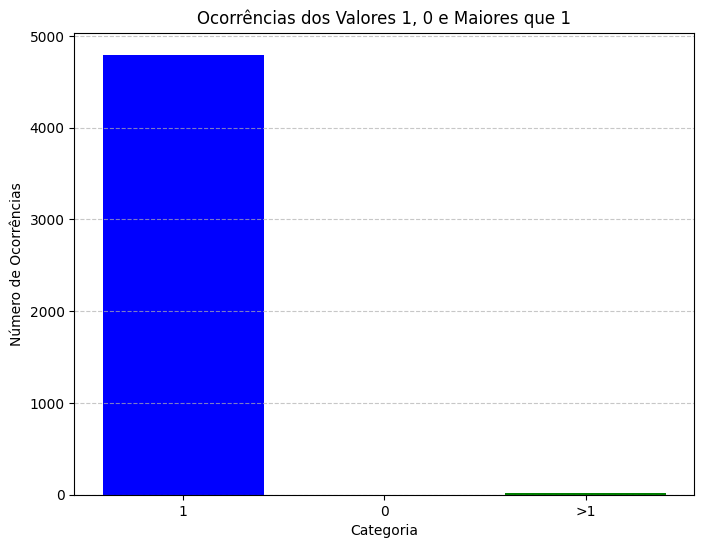

In [ ]:
ocorrencias = contar_ocorrencias(resultado)

df_ocorrencias = pd.DataFrame(list(ocorrencias.items()), columns=['Categoria', 'Contagem'])

plt.figure(figsize=(8, 6))
plt.bar(df_ocorrencias['Categoria'], df_ocorrencias['Contagem'], color=['blue', 'red', 'green'])
plt.xlabel('Categoria')
plt.ylabel('Número de Ocorrências')
plt.title('Ocorrências dos Valores 1, 0 e Maiores que 1')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Naive Bayes (NB)

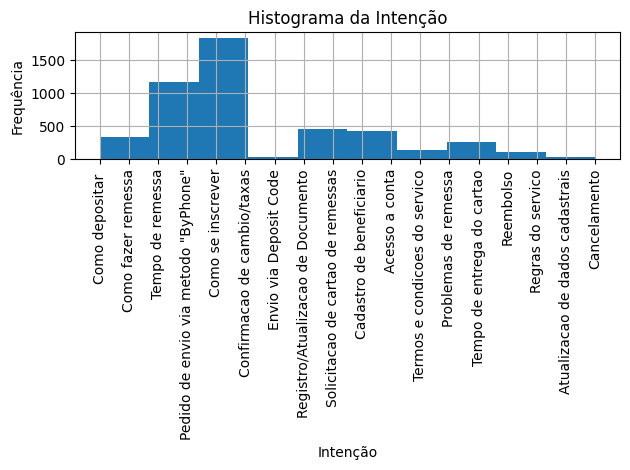

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df_copy é seu DataFrame e 'intencao' é a coluna que você deseja plotar
df_copy['intencao'].hist()

# Ajustar o título e rótulos dos eixos
plt.title('Histograma da Intenção')
plt.xlabel('Intenção')
plt.ylabel('Frequência')

# Ajustar a rotação das labels do eixo x para evitar que fiquem coladas
plt.xticks(rotation=90)

# Melhorar a aparência geral
plt.tight_layout()

# Mostrar o gráfico
plt.show()

<Axes: >

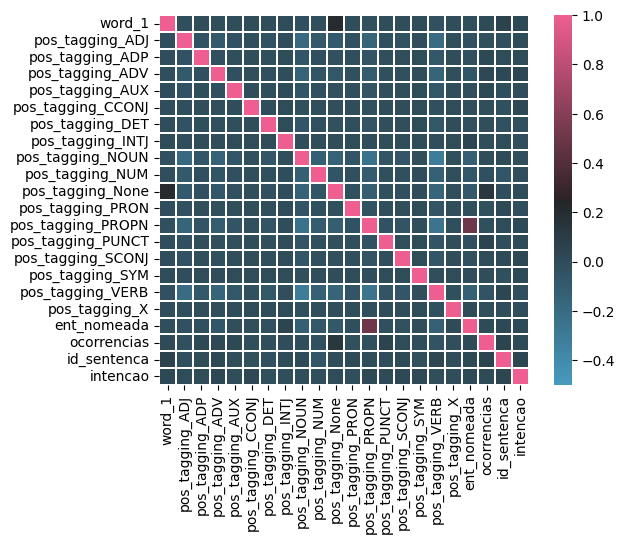

In [ ]:
corr = df_numeric.iloc[:, 1:].corr(method="pearson")
cmap = sns.diverging_palette(230, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

## Definição da função de treinamento do classificador Naive Bayes (NB)

In [ ]:
def train_and_predict_naive_bayes_bow(csv_file):
    # Importando o DataFrame
    df_bow = pd.read_excel(csv_file)

    # Supondo que a coluna de texto seja 'Pergunta'
    X = df_bow['Pergunta']
    y = df_bow['Intencao']

    # Vetorização com Bag of Words (BoW)
    count_vectorizer = CountVectorizer()
    X_bow = count_vectorizer.fit_transform(X)

    # Dividindo em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.25, random_state=42)

    # Treinando o modelo Naive Bayes
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)

    # Realizando previsões
    y_pred = nb_classifier.predict(X_test)

    # Exibindo os resultados
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

    # Gerando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Visualizando a matriz de confusão
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

    # return y_pred, y_test


In [ ]:
def train_and_predict_naive_bayes(df):
    # Importando dataframe com vetorização Bow
    df_bow = df

    X = df_bow.drop(columns=['intencao'])
    y = df_bow['intencao']

    # Verificando se há valores negativos e substituí-los por 0
    X = X.clip(lower=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)

    y_pred = nb_classifier.predict(X_test)

    return y_pred, y_test

## Testes classificador Naive Bayes

In [ ]:
class TestNaiveBayes(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        """Create a sample DataFrame for testing."""
        X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
        cls.df_test = pd.DataFrame(X, columns=[f'word_{i}' for i in range(20)])
        cls.df_test['intencao'] = y

    def test_train_and_predict_naive_bayes(self):
        """Test the train_and_predict_naive_bayes function."""
        y_pred, y_test = train_and_predict_naive_bayes(self.df_test)

        self.assertEqual(len(y_pred), len(y_test), "Length of predictions and true values do not match.")

        # Check accuracy is between 0 and 1
        accuracy = accuracy_score(y_test, y_pred)
        self.assertGreaterEqual(accuracy, 0, "Accuracy should be greater than or equal to 0.")
        self.assertLessEqual(accuracy, 1, "Accuracy should be less than or equal to 1.")

        # Optional: Check classification report to ensure it is generated
        report = classification_report(y_test, y_pred, output_dict=True)
        self.assertIn('0', report, "Classification report does not contain class '0'.")
        self.assertIn('1', report, "Classification report does not contain class '1'.")

def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestNaiveBayes)
    runner = unittest.TextTestRunner(verbosity=2)
    result = runner.run(suite)
    return result

test_results = run_tests()

test_train_and_predict_naive_bayes (__main__.TestNaiveBayes)
Test the train_and_predict_naive_bayes function. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.110s

OK


# Treinamento do modelo

## Preparando Modelo

In [ ]:
y_pred, y_test = train_and_predict_naive_bayes(df_numeric)

In [ ]:
train_and_predict_naive_bayes(df_numeric)

(array([1, 7, 1, ..., 1, 1, 7]),
 1992     3
 1837    16
 4353     0
 705      7
 8        4
         ..
 3893    15
 1743     7
 1172    11
 4339     0
 325     10
 Name: intencao, Length: 1204, dtype: int64)

# Apresentação da matriz de confusão

## Matriz do modelo com bow próprio

- A intensidade da cor nas células representa a frequência das previsões. Cores mais escuras indicam maiores frequências.
- Algumas classes, como "Cancelamento", têm muito poucas previsões corretas ou foram preditas erroneamente em várias ocasiões, evidenciando que o modelo tem dificuldade em distinguir essa intenção das outras.



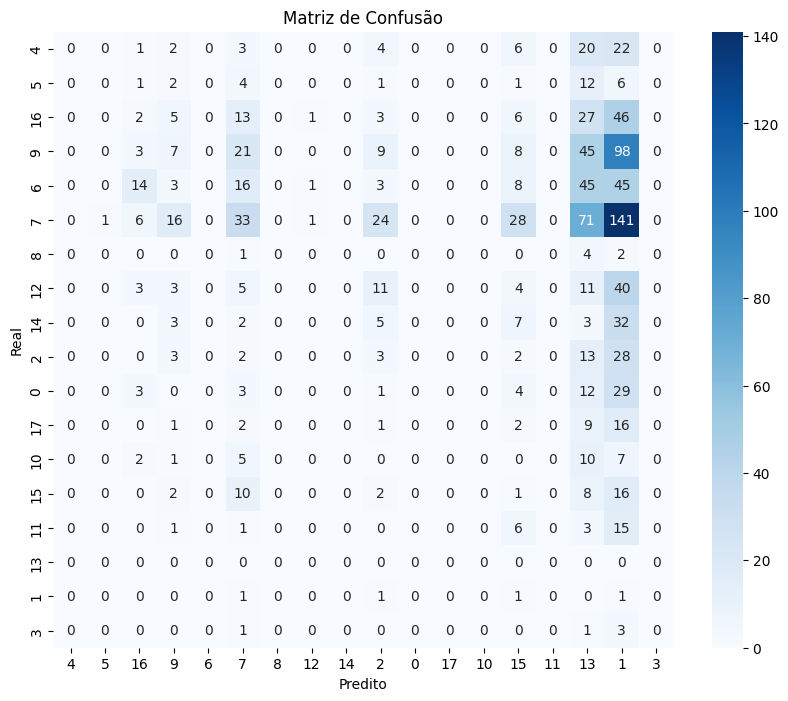

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=df_numeric['intencao'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['intencao'].unique(), yticklabels=df['intencao'].unique())
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


## Métricas Escolhidas Para Avaliar a Qualidade do Modelo

*Métricas usadas*:

- Precisão:

As precisões para todas as classes são muito baixas (muitas vezes zero), o que significa que o modelo faz muitas previsões incorretas, classificando erroneamente as instâncias de outras classes como positivas para uma classe específica.

- Revocação:

As revocações também são baixas para a maioria das classes, indicando que o modelo falha em identificar muitas instâncias positivas (verdadeiros positivos), o que sugere que o modelo não está capturando bem as características de cada classe.

- F1-score

O F1-score reflete as baixas precisões e revocações, resultando em valores muito baixos para todas as classes, indicando que o modelo tem um desempenho ruim geral.



*Comentários*:


- A acurácia geral do modelo é de apenas 0.09 (ou 9%), o que significa que apenas 9% das previsões totais estavam corretas.
As médias (macro avg e weighted avg) para precisão, recall e F1-score são muito baixas, mostrando que o modelo tem dificuldade em lidar com classes de forma consistente.

- O modelo de NB parece também apresenta subajuste, ele não está capturando bem os padrões nos dados de treino. Isso pode ser causado por um modelo muito simples ou inadequado para a complexidade dos dados.


Aprimoramentos Possíveis:

Exploração de modelos mais complexos ou ajustados, como word2vec, que pode lidar melhor com dados mais complexos.


In [ ]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.25      0.00         4
           2       0.04      0.06      0.05        51
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00       135
           7       0.27      0.10      0.15       321
           8       0.00      0.00      0.00         7
           9       0.14      0.04      0.06       191
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        77
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00        52
          15       0.01      0.03      0.02        39
          16       0.06      0.02      0.03       10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Exibindo os resultados
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.25      0.00         4
           2       0.04      0.06      0.05        51
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00       135
           7       0.27      0.10      0.15       321
           8       0.00      0.00      0.00         7
           9       0.14      0.04      0.06       191
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        77
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00        52
          15       0.01      0.03      0.02        39
          16       0.06      0.02      0.03       10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# Modelo com Bow **importada**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Relatório de Classificação:
                                       precision    recall  f1-score   support

                      Acesso a conta       1.00      0.20      0.33         5
     Atualizacao de dados cadastrais       0.00      0.00      0.00         1
            Cadastro de beneficiario       0.14      0.40      0.21         5
                        Cancelamento       0.00      0.00      0.00         4
                      Como depositar       0.33      0.25      0.29         4
                  Como fazer remessa       0.00      0.00      0.00         2
                   Como se inscrever       0.45      0.82      0.58        11
         Confirmacao de cambio/taxas       0.60      1.00      0.75        28
              Envio via Deposit Code       0.00      0.00      0.00         1
Pedido de envio via metodo "ByPhone"       0.81      0.85      0.83        20
                Problemas de remessa       1.00      0.50      0.67         6
                           Reembol

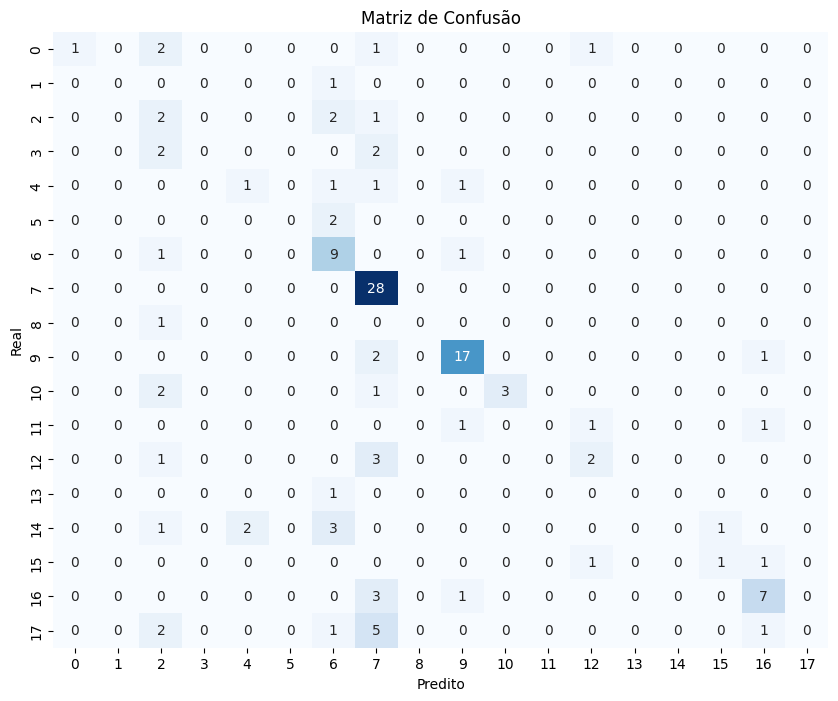

In [ ]:
train_and_predict_naive_bayes_bow('/content/drive/MyDrive/m11/data/chat_clients.xlsx')

# Análise Treinamento GPU x CPU

Abaixo está um marcador de execução de CPU ou GPU, ao executar o modelo, é incializada uma variável de tempo até o final da execução, abaixo irá mostrar o tipo de execução se foi CPU ou GPU e o tempo total de treinamento.

Foram realizados duas execuções do modelo, segue abaixo o resultado obtido em cada um:

- CPU: 2.58 segundos
- GPU: 6.11 segundos

## Comparação de Resultados

- CPU: Teve um desempenho mais rápido, completando a tarefa em menos tempo.
- GPU: Foi mais lenta, possivelmente devido à sobrecarga de transferência de dados, inicialização ou subutilização em um modelo menor.

Apesar de a GPU normalmente ser mais rápida, neste caso, a CPU foi mais eficiente. A escolha entre CPU e GPU deve considerar o tipo de tarefa e a configuração do hardware utilizado.

In [ ]:

device_name = tf.test.gpu_device_name()
if device_name:
    print("Treinado na GPU:", device_name)
else:
    print("Treinado na CPU")

Treinado na CPU


In [ ]:
elapsed_time = time.time() - start_time
print(f"Tempo total de treinamento: {elapsed_time:.2f} segundos")

Tempo total de treinamento: 14.79 segundos
